# The Bisection Method

---

## 1. Introduction

The **Bisection Method** is one of the simplest and most reliable numerical methods for finding roots. It is a bracketing method, meaning it starts with an interval $[a, b]$ that is known to contain a root and systematically shrinks it.

The core idea is straightforward: repeatedly divide the interval in half and select the subinterval where the root must lie, based on the Intermediate Value Theorem. Although it can be slower than other methods, its main advantage is its **guaranteed convergence**—if you start with a valid bracket, it will find a root.

## 2. Stopping Criteria for Iterative Methods

Before diving into the algorithm, we must define when to stop. Since numerical methods provide approximations, we need a rule to decide when our answer is "good enough." This rule is called a **stopping criterion**, and it's usually based on a predefined tolerance, $\epsilon$.

Common stopping criteria for a sequence of approximations $x_k$ include:

1.  **Interval Width (for bracketing methods)**: The process stops when the length of the interval $[a_k, b_k]$ is smaller than the tolerance.
    $$ (b_k - a_k) < \epsilon $$
    *This is the most common criterion for the Bisection Method as it provides a strict upper bound on the absolute error of the root.*

2.  **Absolute Error of the Approximation**: Stop when the change between successive approximations is very small.
    $$ |x_k - x_{k-1}| < \epsilon $$

3.  **Relative Error of the Approximation**: This is often preferred when the magnitude of the root $x_k$ is very large or very small, as it measures the error relative to the value itself.
    $$ \frac{|x_k - x_{k-1}|}{|x_k|} < \epsilon, \quad \text{for } x_k \neq 0 $$

4.  **Function Value Near Zero**: Stop when the function's value at the approximation is very close to zero.
    $$ |f(x_k)| < \epsilon $$
    *This can be misleading if the function is very flat near the root (a small $|f(x_k)|$ doesn't guarantee $x_k$ is close to the true root).* 

## 3. The Bisection Method Algorithm

#### Preconditions:
1.  A function $f(x)$ that is **continuous** on an interval $[a, b]$.
2.  The function values at the endpoints have **opposite signs**, i.e., $f(a) \cdot f(b) < 0$. (This brackets the root).

#### Algorithm Steps:
1.  **Initialization**: Choose an initial interval $[a, b]$ and a tolerance $\epsilon > 0$.
2.  **Iteration**: Repeat the following steps until the stopping criterion is met:

    a. Calculate the midpoint of the interval: $x_m = \frac{a + b}{2}$.

    b. Evaluate the function at the midpoint, $f(x_m)$.

    c. **Update the interval**:<br>
        If $f(a) \times f(x_m) < 0$, the root is in the left half. Set the new interval to $[a, x_m]$ (i.e., set $b = x_m$).<br>
        If $f(b) \cdot f(x_m) < 0$, the root is in the right half. Set the new interval to $[x_m, b]$ (i.e., set $a = x_m$).<br>
        If $f(x_m) = 0$, the exact root has been found, and the algorithm can stop.<br>

3.  **Termination**: Once the stopping criterion (e.g., $b - a < \epsilon$) is satisfied, the best approximation for the root is the midpoint of the final interval, $\frac{a+b}{2}$.

### Manual Example: $f(x) = x^3 - 9x + 3$

Let's find the root in the interval $I = [0, 1]$ with a tolerance of $\epsilon = 0.1$.

In [1]:
import pandas as pd

def f(x):
    return x**3 - 9*x + 3

a, b = 0.0, 1.0
tol = 0.1
k = 0

results = []

# Check initial condition
if f(a) * f(b) >= 0:
    print("Bisection method fails. f(a) and f(b) must have opposite signs.")
else:
    while (b - a) >= tol:
        k += 1
        xm = (a + b) / 2
        fxm = f(xm)
        
        results.append([k, a, b, xm, f(a), f(b), fxm, b-a])
        
        if f(a) * fxm < 0:
            b = xm
        elif f(b) * fxm < 0:
            a = xm
        else: # f(xm) is exactly 0
            break
            
    # Final approximation
    root_approx = (a + b) / 2
    
    df = pd.DataFrame(results, columns=['k', 'a', 'b', 'xm', 'f(a)', 'f(b)', 'f(xm)', 'b-a'])
    df.set_index('k', inplace=True)
    print("--- Bisection Method Iterations ---")
    display(df)
    print(f"\nRoot approximation after {k} iterations: {root_approx:.5f}")

--- Bisection Method Iterations ---


,a,b,xm,f(a),f(b),f(xm),b-a
k,,,,,,,
1,0.00,1.000,0.5000,3.000000,-5.000000,-1.375000,1.000
2,0.00,0.500,0.2500,3.000000,-1.375000,0.765625,0.500
3,0.25,0.500,0.3750,0.765625,-1.375000,-0.322266,0.250
4,0.25,0.375,0.3125,0.765625,-0.322266,0.218018,0.125



Root approximation after 4 iterations: 0.34375


## 4. Python Implementation

The approximate root is: 1.430443
The value of f(root) is: -3.678356e-06


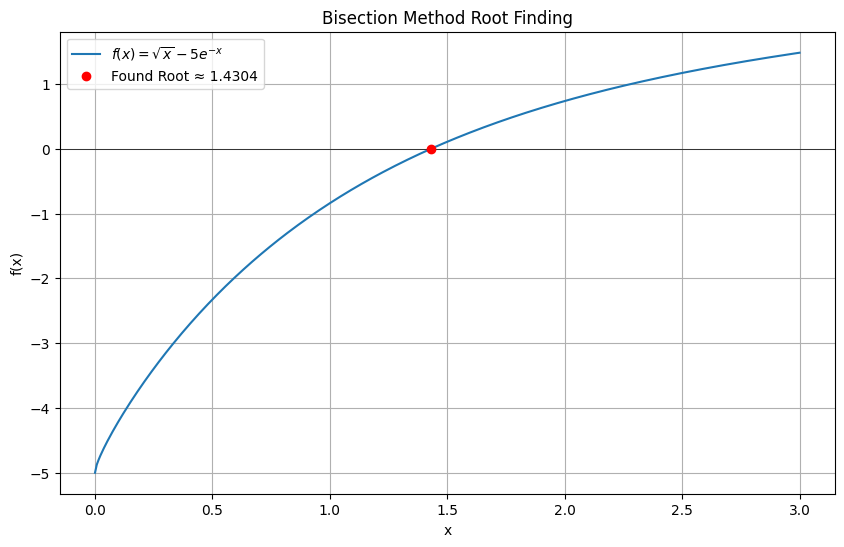

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(func, a, b, tol=1e-6, max_iter=100):
    """
    Finds a root of a function using the bisection method.
    
    Args:
        func: The function for which to find a root.
        a, b: The endpoints of the interval [a, b].
        tol: The desired tolerance (stopping criterion for interval width).
        max_iter: The maximum number of iterations to perform.
        
    Returns:
        The approximate root, or None if the method fails.
    """
    # Check if a root is guaranteed to be in the interval
    if func(a) * func(b) >= 0:
        print("Bisection method fails: f(a) and f(b) must have opposite signs.")
        return None
    
    iterations = 0
    while (b - a) / 2.0 > tol and iterations < max_iter:
        midpoint = (a + b) / 2.0
        
        if func(midpoint) == 0:
            return midpoint # Exact root found
        elif func(a) * func(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
            
        iterations += 1
        
    return (a + b) / 2.0

# --- Example Usage ---
# Define the function f(x) = sqrt(x) - 5e^(-x)
def f2(x):
    return np.sqrt(x) - 5 * np.exp(-x)

# Define the interval and tolerance
interval_a = 1.0
interval_b = 2.0
tolerance = 1e-5

# Find the root
root = bisection_method(f2, interval_a, interval_b, tol=tolerance)

if root is not None:
    print(f"The approximate root is: {root:.6f}")
    print(f"The value of f(root) is: {f2(root):.6e}")

    # --- Visualization ---
    x_vals = np.linspace(0, 3, 400)
    y_vals = f2(x_vals)
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='$f(x) = \sqrt{x} - 5e^{-x}$')
    plt.axhline(0, color='black', lw=0.5)
    plt.scatter(root, f2(root), color='red', zorder=5, label=f'Found Root ≈ {root:.4f}')
    plt.title('Bisection Method Root Finding')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

## 5. Estimating the Number of Iterations

A unique advantage of the Bisection Method is that we can predict the exact number of iterations, $k$, required to achieve a certain tolerance, $\epsilon$.

Let the initial interval be $[a_0, b_0]$. After one iteration, the interval width is $\frac{b_0 - a_0}{2}$. After $k$ iterations, the width will be:
$$ b_k - a_k = \frac{b_0 - a_0}{2^k} $$

We want to find the smallest $k$ that satisfies our stopping criterion, $b_k - a_k < \epsilon$. Therefore:
$$ \frac{b_0 - a_0}{2^k} < \epsilon $$

Solving for $k$:
$$ 2^k > \frac{b_0 - a_0}{\epsilon} $$
$$ k \cdot \log(2) > \log(b_0 - a_0) - \log(\epsilon) $$
$$ k > \frac{\log(b_0 - a_0) - \log(\epsilon)}{\log(2)} $$

Since $k$ must be an integer, we take the ceiling of this result.

In [3]:
def estimate_bisection_iterations(a, b, tol):
    """Estimates the number of iterations required for the bisection method."""
    if tol <= 0:
        return float('inf')
    
    k = (np.log(b - a) - np.log(tol)) / np.log(2)
    return np.ceil(k)

# Estimate for the previous example
a, b = 1.0, 2.0
tolerance = 1e-5

required_iterations = estimate_bisection_iterations(a, b, tolerance)
print(f"For interval [{a}, {b}] and tolerance {tolerance}:")
print(f"Predicted number of iterations: {int(required_iterations)}")

For interval [1.0, 2.0] and tolerance 1e-05:
Predicted number of iterations: 17


## 6. Advantages and Disadvantages

#### Advantages:
1.  **Guaranteed Convergence**: If the initial interval brackets a root, the method is guaranteed to converge to that root.
2.  **Simplicity**: The algorithm is easy to understand and implement.
3.  **Error Bound**: The absolute error is always less than half the length of the current interval, providing a predictable and strict error bound.

#### Disadvantages:
1.  **Slow Convergence**: The method converges linearly, which is much slower than other methods like Newton's. The interval width is only halved at each step, regardless of the function's shape.
2.  **Ignores Function Information**: It only uses the *sign* of $f(x)$ at the endpoints and midpoint, ignoring the magnitude. A point where $f(x)$ is very close to zero is treated the same as one where it's far away.